In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [2]:
# Read dataset
df = pd.read_csv("netflix_titles.csv")

In [3]:
# Menampilkan head dari dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# EDA

In [4]:
# Informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Dataset terdiri dari 12 kolom dan 8807 baris data. Semua kolom merupakan categorical column, kecuali release_year yang merupakan numerical_column. Terdapat missing values di beberapa kolom, seperti director, cast, country, date_added, rating, dan duration.

In [5]:
# Statistik deskriptif dari numerical column
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# Pemisahan numerical dan categorical column
cols = df.columns
num_cols = ['release_year']
cat_cols = cols.difference(num_cols)

In [7]:
# Cek unique value untuk semua kolom
for i in cols:
  print(i, df[i].unique())
  print("\n")

show_id ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']


type ['Movie' 'TV Show']


title ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']


director ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']


cast [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sa

In [8]:
# Cek value counts untuk semua kolom
for i in cols :
  print(i, df[i].value_counts())
  print("\n")

show_id show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64


type type
Movie      6131
TV Show    2676
Name: count, dtype: int64


title title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64


director director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                     

## Plot

### Distribusi Type

C:\Users\evely\AppData\Local\Temp\ipykernel_27520\1787645128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=type_data.values, x=type_data.index, palette=['blue', 'gray'])


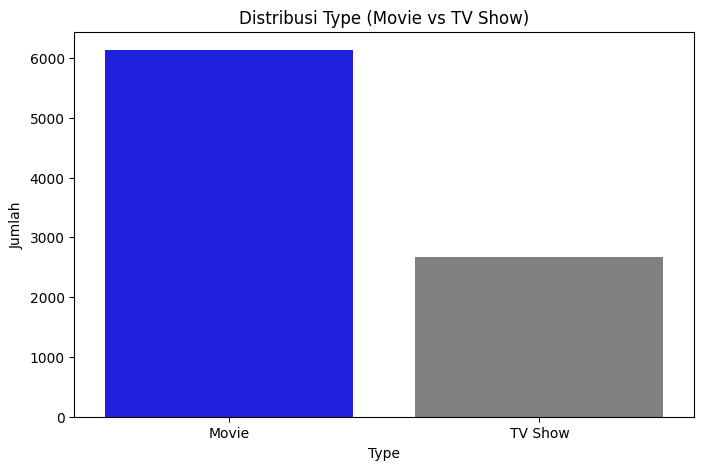

In [9]:
# Count jumlah film per type
type_data = df['type'].value_counts()

# Plot distribusi type
plt.figure(figsize=(8,5))
sns.barplot(y=type_data.values, x=type_data.index, palette=['blue', 'gray'])
plt.title('Distribusi Type (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('Jumlah')
plt.show()

### Distribusi Release Year

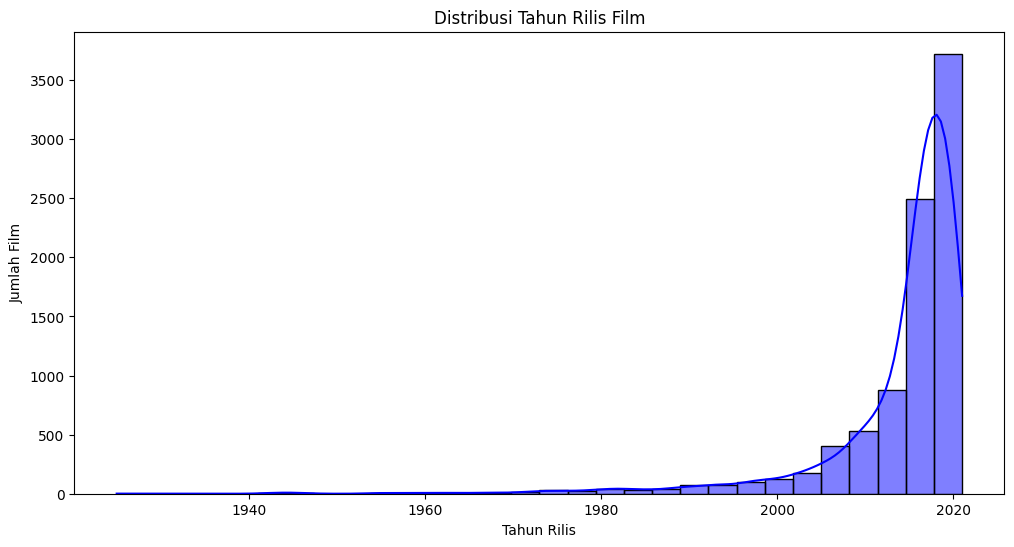

In [10]:
# Plot distribusi release_year
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, color='blue', kde=True)
plt.title('Distribusi Tahun Rilis Film')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Film')
plt.show()

### Distribusi Listed In

C:\Users\evely\AppData\Local\Temp\ipykernel_27520\3403327172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_data.values, y=genre_data.index, palette=colors)


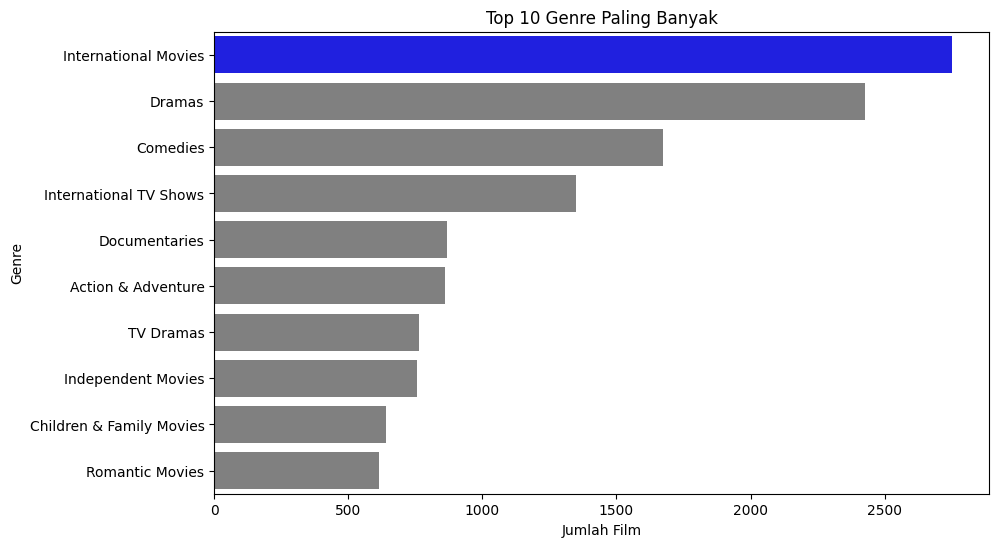

In [11]:
# Count jumlah film per genre
genre_data = df['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts().head(10)

# Plot distribusi listed_in
plt.figure(figsize=(10,6))
colors = ['blue'] + ['gray']*(len(genre_data)-1)
sns.barplot(x=genre_data.values, y=genre_data.index, palette=colors)
plt.title('Top 10 Genre Paling Banyak')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

### Distribusi Country

C:\Users\evely\AppData\Local\Temp\ipykernel_27520\2987212380.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data.values, y=country_data.index, palette=colors)


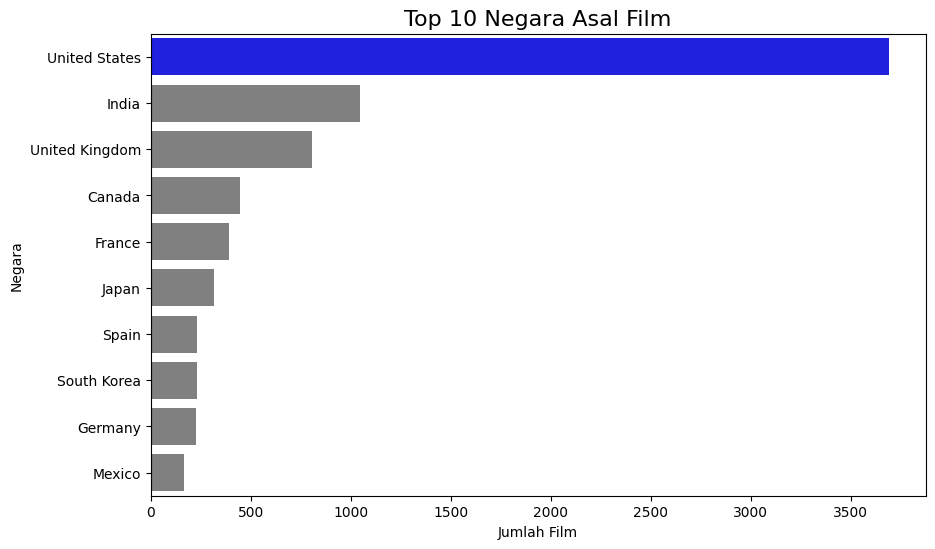

In [12]:
# Count jumlah film berdasarkan negara
country_data = df['country'].dropna().str.split(',', expand=True).stack().str.strip().value_counts().head(10)

# Plot distribusi country
plt.figure(figsize=(10,6))
colors = ['blue'] + ['gray']*(len(genre_data)-1)
sns.barplot(x=country_data.values, y=country_data.index, palette=colors)
plt.title('Top 10 Negara Asal Film', fontsize=16)
plt.xlabel('Jumlah Film')
plt.ylabel('Negara')
plt.show()

### Distribusi Rating

C:\Users\evely\AppData\Local\Temp\ipykernel_27520\1301974183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_data.values, y=rating_data.index, palette=colors)


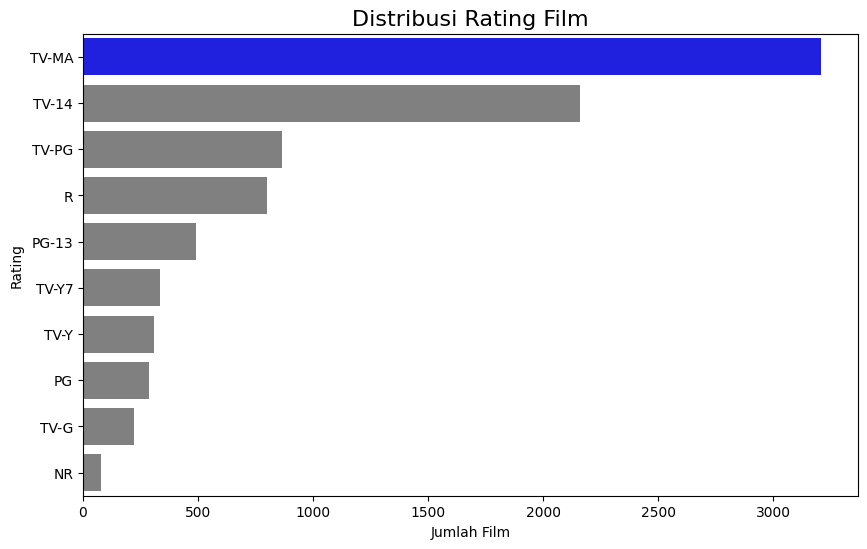

In [13]:
# Count jumlah film berdasarkan rating
rating_data = df['rating'].value_counts().head(10)

# Plot distribusi rating
plt.figure(figsize=(10,6))
colors = ['blue'] + ['gray']*(len(genre_data)-1)
sns.barplot(x=rating_data.values, y=rating_data.index, palette=colors)
plt.title('Distribusi Rating Film', fontsize=16)
plt.xlabel('Jumlah Film')
plt.ylabel('Rating')
plt.show()

# Mengambil Fitur Untuk Sistem Rekomendasi

In [14]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Pada recommendation system ini, kami tidak melakukan drop NULL ataupun imputasi, tetapi kami akan melakukan NULL handling dengan skip column data yang memiliki data NULL karena seperti yang dapat dilihat diatas, hanya beberapa column yang memiliki NULL seperti director, cast, country, dll. Data-data tersebut tidaklah berperan signifikan dalam recommendation system.

In [15]:
# Informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
# Fitur untuk sistem rekomendasi
def combined(row):
    items = []

    if pd.notna(row['title']):
        items.append(str(row['title']))
    if pd.notna(row['type']):
        items.append(str(row['type']))
    if pd.notna(row['country']):
        items.append(str(row['country']))
    if pd.notna(row['rating']):
        items.append(str(row['rating']))
    if pd.notna(row['listed_in']):
        items.append(str(row['listed_in']))

    return ' '.join(items)

df['text'] = df.apply(combined, axis=1)

In [17]:
# Pre-process kolom text
df['text'] = df['text'].str.lower()

Pembuatan kolom baru yaitu 'text' yang akan menjadi kolom utama untuk TF-IDF vectorization nantinya.

In [18]:
# Cek duplicated row
df.duplicated().sum()

0

In [19]:
# Reset index
df = df.reset_index(drop=True)
# df.info()

# Recommendation System

In [20]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.04965229 0.08897803 0.00986202]
 [0.         1.         0.26591258 ... 0.         0.         0.07621528]
 [0.         0.26591258 1.         ... 0.         0.         0.06115436]
 ...
 [0.04965229 0.         0.         ... 1.         0.13308545 0.03432059]
 [0.08897803 0.         0.         ... 0.13308545 1.         0.03305167]
 [0.00986202 0.07621528 0.06115436 ... 0.03432059 0.03305167 1.        ]]


In [21]:
# Function untuk memperoleh rekomendasi
df['title_lower'] = df['title'].str.lower()
indices = pd.Series(df.index, index=df['title_lower']).to_dict()

def get_recommendations(title, cosine_sim=cosine_sim, num_recommend = 5):
    title = title.lower()
    idx = indices.get(title)
    if idx is None:
        return f"Film '{title}' tidak ditemukan dalam database."

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda df: df[1], reverse=True)
    top_similar = sim_scores[1:num_recommend+1]

    movie_indices = [i[0] for i in top_similar]
    ret_df = pd.DataFrame(df[['title', 'type', 'country', 'rating', 'listed_in']].iloc[movie_indices])
    ret_df['score'] = [i[1] for i in top_similar]
    return ret_df.reset_index(drop=True)

In [22]:
def show_movie(title):
    res = df[df['title'] == title]
    return res[['title', 'type', 'country', 'rating', 'listed_in']]

In [23]:
df['title'].head(30)

0                                  Dick Johnson Is Dead
1                                         Blood & Water
2                                             Ganglands
3                                 Jailbirds New Orleans
4                                          Kota Factory
5                                         Midnight Mass
6                      My Little Pony: A New Generation
7                                               Sankofa
8                         The Great British Baking Show
9                                          The Starling
10                  Vendetta: Truth, Lies and The Mafia
11                                     Bangkok Breaking
12                                         Je Suis Karl
13                     Confessions of an Invisible Girl
14                      Crime Stories: India Detectives
15                                    Dear White People
16    Europe's Most Dangerous Man: Otto Skorzeny in ...
17                                      Falsa id

# Test Case

## Test Case 1

In [24]:
result = get_recommendations('The Irishman')
result

,title,type,country,rating,listed_in,score
0,Kill the Irishman,Movie,United States,R,"Action & Adventure, Dramas, Independent Movies",0.719337
1,The Irishman: In Conversation,Movie,United States,TV-MA,Documentaries,0.674429
2,The Show,Movie,United States,TV-MA,Dramas,0.312368
3,All Together Now,Movie,United States,PG,Dramas,0.298735
4,5 to 7,Movie,United States,R,"Comedies, Dramas, Romantic Movies",0.237698


In [25]:
show_movie('The Irishman')

,title,type,country,rating,listed_in
3227,The Irishman,Movie,United States,R,Dramas


## Test Case 2

In [26]:
result2 = get_recommendations('Once Upon a Time in London')
result2

,title,type,country,rating,listed_in,score
0,About Time,Movie,United Kingdom,R,"Comedies, Dramas, International Movies",0.682120
1,Time Please,Movie,India,TV-14,"Comedies, Dramas, International Movies",0.528949
2,London Heist,Movie,United Kingdom,R,Action & Adventure,0.528663
3,Postcards from London,Movie,United Kingdom,TV-MA,"Dramas, Independent Movies, LGBTQ Movies",0.523217
4,Time Out,Movie,India,TV-14,"Dramas, Independent Movies, International Movies",0.508248


In [27]:
show_movie('Once Upon a Time in London')

,title,type,country,rating,listed_in
7658,Once Upon a Time in London,Movie,United Kingdom,TV-MA,"Dramas, International Movies"


## Test Case 3

In [28]:
result3 = get_recommendations('Paranoia')
result3

,title,type,country,rating,listed_in,score
0,The Next Three Days,Movie,"United States, France",PG-13,"Dramas, Thrillers",0.456836
1,Now and Then,Movie,United States,PG-13,Dramas,0.412281
2,Unknown,Movie,"United Kingdom, Germany, France, United States",PG-13,"Action & Adventure, Thrillers",0.371472
3,The Interpreter,Movie,"United Kingdom, France, Germany, United States",PG-13,Thrillers,0.365300
4,The Last Exorcism,Movie,"France, United States",PG-13,"Horror Movies, Independent Movies, Thrillers",0.357754


In [29]:
show_movie('Paranoia')

,title,type,country,rating,listed_in
29,Paranoia,Movie,"United States, India, France",PG-13,Thrillers


# Save Model

In [30]:
def save_model_to_file(tfidf_filename, indices_filename):
  with open(tfidf_filename, 'wb') as file:
      pickle.dump(tfidf_matrix, file)
  with open(indices_filename, 'wb') as file:
      pickle.dump(indices, file)
  df[['title', 'type', 'country', 'rating', 'listed_in']].to_pickle('netflix_title.pkl')


In [31]:
save_model_to_file('tfidfmatrix.pkl', 'indices.pkl')